### Notebook 1: Warm up on Pre-processing using Pandas, Matplotlib (and a little Scikit Learn).

Consider the data collected for a set of cars.  This data is available in .csv format in the file auto.csv. Use pandas (as well as other libraries as mentioned) to perform the following tasks. 

In [482]:
# import packages
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

Next, let's check the working directory.

In [483]:
%pwd

'C:\\Users\\ibrah\\OneDrive\\Documents\\AData_Analytics\\BIA-6303PredModels\\BI6303-predictivesModels\\module1\\data'

Directory access

In [484]:
cd C:\\Users\\ibrah\\OneDrive\\Documents\\AData_Analytics\\BIA-6303PredModels\\BI6303-predictivesModels\\module1\\data

C:\Users\ibrah\OneDrive\Documents\AData_Analytics\BIA-6303PredModels\BI6303-predictivesModels\module1\data


##### 1.	Read in AUTO.csv file into a data frame and call it Auto. 

In [485]:
#import Using Pandas 
#Because of errors msg, we'll use the encoding 'ISO-8859-1' or 'latin 1'
auto0=pd.read_csv("auto_data.csv", encoding='latin1', engine='python')
auto0.head(10)

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,31,Regular,13.2,172,101,67,39,"2,635",47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,Acura TL,Front,22,Premium,17.1,193,108,70,40,"3,460",50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,Audi A4,Front,22,Premium,15.9,178,103,68,36,"3,345",50.5,14.0,54.0,40.5,3.5,52.0,24.5,2.0
3,Audi A6,Front,20,Premium,18.5,192,109,71,39,"3,785",51.0,15.0,55.0,42.0,4.0,55.0,30.0,3.5
4,BMW 3-Series,Rear,24,Premium,16.6,176,107,69,36,"3,265",50.0,11.0,55.0,41.5,3.5,54.0,26.0,3.0
5,BMW 5-Series,Rear,20,Premium,18.5,188,111,71,38,"3,585",51.0,11.0,57.0,43.0,3.5,55.0,29.0,3.5
6,Buick Century,Front,22,Regular,17.5,195,109,73,40,"3,350",50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
7,Buick LeSabre,Front,20,Regular,17.5,200,112,74,42,"3,640",51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
8,Buick Park Avenue,Front,21,Regular,18.5,207,114,75,43,"3,880",51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0
9,Buick Regal,Front,21,Regular,17.5,196,109,73,40,"3,325",50.5,17.0,58.0,43.0,5.0,56.5,29.0,2.5


The auto dataset contains 106 rows and 18 features.

### Dataset cleaning:

Now let's check our dataset in order to detect and correct (or remove) corrupt or inaccurate records. 

First, I am  now Checking the variables types.

In [486]:
#show variables info
auto0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 18 columns):
Name                        106 non-null object
Drive Type                  106 non-null object
Mileage (mpg)               106 non-null int64
Fuel Type                   106 non-null object
Capacity (gal)              106 non-null float64
Length (inches)             106 non-null int64
Wheel Base (inches)         106 non-null int64
Width (inches)              106 non-null int64
Turning Circle (feet)       106 non-null int64
Weight (lbs)                106 non-null object
Door Top (inches)           106 non-null float64
Luggage (cu. ft.)           104 non-null float64
Front Shoulder (inches)     106 non-null float64
Front Leg Room (inches)     106 non-null float64
Front Head Room (inches)    106 non-null float64
Rear Shoulder (inches)      106 non-null float64
Rear Leg Room (inches)      106 non-null float64
Rear Head Room (inches)     106 non-null float64
dtypes: float64(9), int64(5

The variable 'Weight' is a type object (string), we therefore need to convert the column in the appropiate type, i.e numeric (float). 

In [487]:
def convert_value(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
    """
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)

In [488]:
#Using the convert_value function
auto0['Weight (lbs)'].apply(convert_value)

#OR using lambda function 
#auto_df['Weight (lbs)']=auto_df['Weight (lbs)'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

0      2635.0
1      3460.0
2      3345.0
3      3785.0
4      3265.0
        ...  
101    2780.0
102    3175.0
103    2960.0
104    3305.0
105    3630.0
Name: Weight (lbs), Length: 106, dtype: float64

Now I am going to import again the auto data set using the function convert_value for weight and limit the dataset to its size.

In [489]:
auto= pd.read_csv("auto_data.csv", encoding='latin1', engine='python',
                   converters={'Weight (lbs)': convert_value
                              })
#auto.head(10)
auto.tail(10)

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
96,Toyota Corolla,Front,30,Regular,13.2,174,97,67,34,2530.0,49.0,12.0,53.0,40.0,4.0,52.0,24.5,1.0
97,Toyota Land Cruiser,Front,14,Premium,25.4,193,112,76,42,5435.0,66.5,50.0,61.5,40.0,3.5,61.0,29.0,4.5
98,Toyota RAV4,Front,22,Regular,15.3,163,95,67,38,3000.0,59.0,28.0,53.0,39.5,3.5,52.5,24.5,4.5
99,Toyota Sienna,Front,19,Regular,21.0,194,114,73,44,3990.0,60.5,63.5,60.0,41.5,6.5,62.0,33.0,4.5
100,Volkswagen Jetta,Front,21,Regular,14.5,172,99,68,36,2940.0,51.0,13.0,54.0,41.0,4.0,52.5,25.5,1.5
101,Volkswagen New Beetle,Front,29,Regular,14.5,161,99,68,36,2780.0,52.5,12.0,52.0,42.5,8.0,48.0,27.5,0.5
102,Volkswagen Passat,Front,24,Premium,16.4,184,106,69,38,3175.0,51.0,15.0,55.5,42.5,6.5,53.5,29.0,3.0
103,Volvo S40/V40,Front,22,Regular,15.8,176,100,68,38,2960.0,50.0,13.0,54.5,41.0,4.5,53.5,26.5,2.5
104,Volvo S70/V70,Front,21,Regular,18.5,186,105,69,38,3305.0,50.0,15.0,56.0,42.5,3.0,56.5,30.0,3.0
105,Volvo S80,Front,21,Regular,21.1,190,110,72,40,3630.0,51.5,14.0,58.5,41.5,3.5,56.5,28.5,4.0


Let's check again the features types

In [490]:
auto=pd.DataFrame(auto)
auto["Weight (lbs)"]=auto['Weight (lbs)'].astype('float')

Finding the total number of rows and columns with the shape attribute

In [491]:
 auto.shape

(106, 18)

In [492]:
auto.dtypes

Name                         object
Drive Type                   object
Mileage (mpg)                 int64
Fuel Type                    object
Capacity (gal)              float64
Length (inches)               int64
Wheel Base (inches)           int64
Width (inches)                int64
Turning Circle (feet)         int64
Weight (lbs)                float64
Door Top (inches)           float64
Luggage (cu. ft.)           float64
Front Shoulder (inches)     float64
Front Leg Room (inches)     float64
Front Head Room (inches)    float64
Rear Shoulder (inches)      float64
Rear Leg Room (inches)      float64
Rear Head Room (inches)     float64
dtype: object

Finding variables with missing variables. The following functions gives for the number and percent of missing values of each column. 

In [493]:
def assess_NA(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [494]:
df_NA=assess_NA(auto)
df_NA

,Number of NA,Percent NA
Luggage (cu. ft.),2,1.89


It comes out only the variable "luggage" has two missing records that which  we will replace by median of the feature

##### 2.	Replace any missing values with the median value of the column.

In [495]:
# Impute with median on 
auto= auto.fillna(auto.median())
#auto

Now the auto dataset is cleaned. 

In [496]:
auto.head()

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,31,Regular,13.2,172,101,67,39,2635.0,47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,Acura TL,Front,22,Premium,17.1,193,108,70,40,3460.0,50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,Audi A4,Front,22,Premium,15.9,178,103,68,36,3345.0,50.5,14.0,54.0,40.5,3.5,52.0,24.5,2.0
3,Audi A6,Front,20,Premium,18.5,192,109,71,39,3785.0,51.0,15.0,55.0,42.0,4.0,55.0,30.0,3.5
4,BMW 3-Series,Rear,24,Premium,16.6,176,107,69,36,3265.0,50.0,11.0,55.0,41.5,3.5,54.0,26.0,3.0


#### 3.	Exploring the general characteristics of the data, by computing the means and standard deviations of the numerical attributes, as well as the distributions of “drive type” and “fuel type” (categorical).

In [497]:
auto.describe()

,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,21.292453,17.883019,187.594340,107.632075,70.915094,39.849057,3502.311321,53.891509,25.056604,56.471698,41.254717,4.287736,54.745283,28.363208,3.023585
std,3.769469,3.425714,12.493639,7.014713,3.237041,2.797252,633.453939,5.747465,18.235538,3.041640,1.021775,1.279784,7.110437,2.196895,1.370405
min,13.000000,12.100000,152.000000,93.000000,66.000000,34.000000,2420.000000,46.500000,10.000000,51.500000,39.000000,1.500000,6.500000,22.500000,0.000000
25%,19.000000,15.825000,178.000000,103.000000,68.000000,38.000000,3106.250000,50.000000,14.000000,54.000000,40.500000,3.500000,52.625000,27.000000,2.000000
50%,21.000000,17.400000,188.000000,107.000000,70.000000,40.000000,3395.000000,51.000000,16.000000,56.000000,41.000000,4.500000,56.000000,28.500000,3.000000
75%,23.000000,19.000000,195.000000,112.000000,73.000000,41.000000,3890.000000,60.000000,30.750000,58.500000,42.000000,5.000000,57.000000,30.000000,4.000000
max,31.000000,30.000000,226.000000,139.000000,80.000000,49.000000,5850.000000,70.500000,76.000000,63.500000,44.000000,8.000000,64.500000,34.000000,6.000000


#### Exploratory Data Analysis:

In [498]:
#mean of dataframe
auto.mean()

Mileage (mpg)                 21.292453
Capacity (gal)                17.883019
Length (inches)              187.594340
Wheel Base (inches)          107.632075
Width (inches)                70.915094
Turning Circle (feet)         39.849057
Weight (lbs)                3502.311321
Door Top (inches)             53.891509
Luggage (cu. ft.)             25.056604
Front Shoulder (inches)       56.471698
Front Leg Room (inches)       41.254717
Front Head Room (inches)       4.287736
Rear Shoulder (inches)        54.745283
Rear Leg Room (inches)        28.363208
Rear Head Room (inches)        3.023585
dtype: float64

In [499]:
#shorten the Weight name 
auto_Weight=auto['Weight (lbs)']

In [500]:
#Example, descriptive statistics for the variable weight(lbs)
print(auto_Weight.min()),
print(auto_Weight.max()),
print(auto_Weight.std()),
print(auto_Weight.mean())

2420.0
5850.0
633.4539388404849
3502.311320754717


In [501]:
#using pandas, count by category drive type.
auto.groupby('Drive Type').size()

Drive Type
Front    81
Rear     25
dtype: int64

In [502]:
#using pandas, count by category fuel type.
auto.groupby('Fuel Type').size()

Fuel Type
Premium    19
Regular    87
dtype: int64

#### 4. Using z-score normalization to standardize the values of the Weight attribute.

In [503]:
auto_Weight=auto['Weight (lbs)']

In [504]:
#Transform to Z-Scores of the Weight attribute
weight_z=pd.DataFrame((auto_Weight-auto_Weight.mean())/auto_Weight.std())
weight_z.head(10)

,Weight (lbs)
0,-1.369178
1,-0.066795
2,-0.248339
3,0.446266
4,-0.374631
5,0.130536
6,-0.240446
7,0.217362
8,0.596237
9,-0.279912


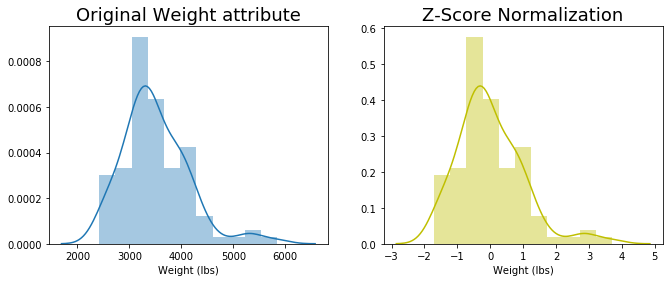

In [505]:
plt.figure(figsize = (11,4))
plt.subplot(1,2,1)
sn.distplot(auto['Weight (lbs)'])
plt.title('Original Weight attribute', fontsize=18)
plt.subplot(1,2,2)
sn.distplot(weight_z, color="y")
plt.xlabel('Weight (lbs)')
plt.title('Z-Score Normalization', fontsize=18)


plt.show()

#### 5.	Convert the categorical variables into dummies.

This means to convert each categorical attribute into multiple attributes (dummies) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record. 

In [506]:
#create the new dataset (auto2) with dummy variables 
auto2=pd.DataFrame(pd.get_dummies(auto,columns=['Drive Type', 'Fuel Type']))
auto2.head(10)

,Name,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches),Drive Type_Front,Drive Type_Rear,Fuel Type_Premium,Fuel Type_Regular
0,Acura Integra,31,13.2,172,101,67,39,2635.0,47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5,1,0,0,1
1,Acura TL,22,17.1,193,108,70,40,3460.0,50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0,1,0,1,0
2,Audi A4,22,15.9,178,103,68,36,3345.0,50.5,14.0,54.0,40.5,3.5,52.0,24.5,2.0,1,0,1,0
3,Audi A6,20,18.5,192,109,71,39,3785.0,51.0,15.0,55.0,42.0,4.0,55.0,30.0,3.5,1,0,1,0
4,BMW 3-Series,24,16.6,176,107,69,36,3265.0,50.0,11.0,55.0,41.5,3.5,54.0,26.0,3.0,0,1,1,0
5,BMW 5-Series,20,18.5,188,111,71,38,3585.0,51.0,11.0,57.0,43.0,3.5,55.0,29.0,3.5,0,1,1,0
6,Buick Century,22,17.5,195,109,73,40,3350.0,50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0,1,0,0,1
7,Buick LeSabre,20,17.5,200,112,74,42,3640.0,51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5,1,0,0,1
8,Buick Park Avenue,21,18.5,207,114,75,43,3880.0,51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0,1,0,0,1
9,Buick Regal,21,17.5,196,109,73,40,3325.0,50.5,17.0,58.0,43.0,5.0,56.5,29.0,2.5,1,0,0,1


In [507]:
dummy.shape

(106, 20)

#### 6.	Perform basic correlation analysis (a correlation matrix) among the attributes. 

In [508]:
#correlation matrix
corrMatrix = auto.corr()

We can observe the relation between features either by drawing a heat map from seaborn or scatter matrix from pandas. 

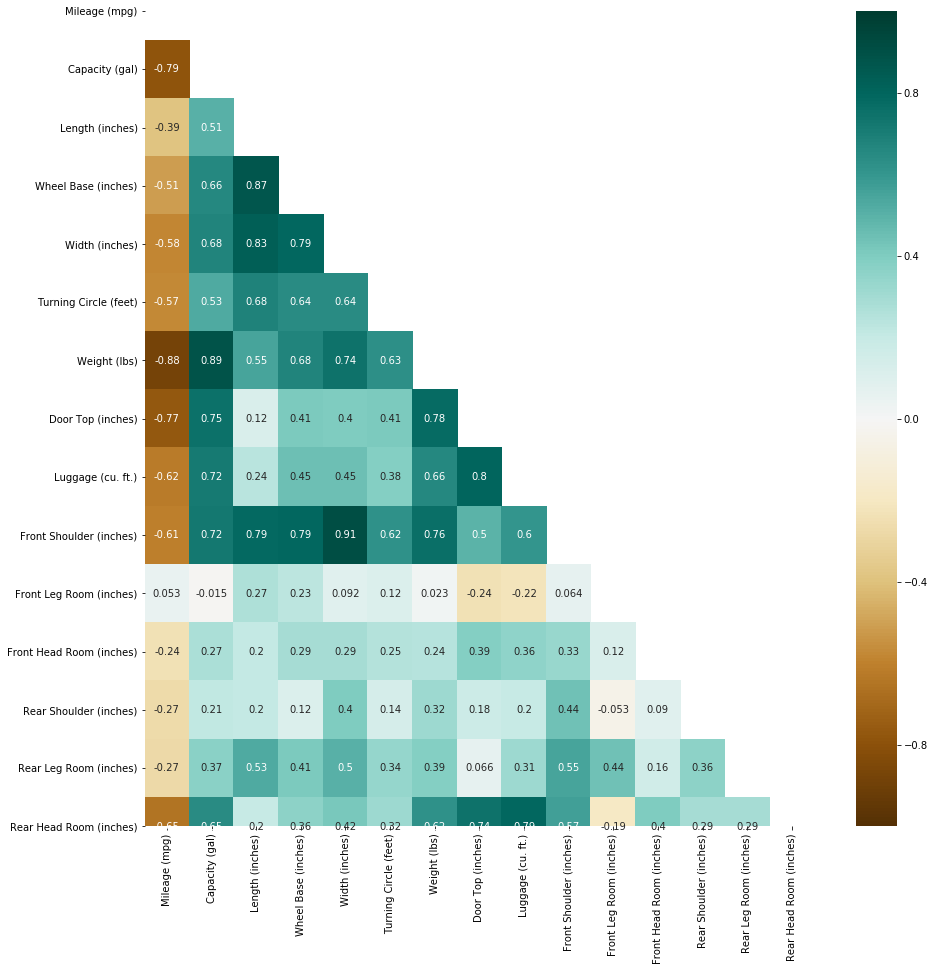

In [509]:
#plot using seaborn library
plt.figure(figsize=(15,15))
mask=np.zeros_like(corrMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sn.heatmap(corrMatrix, 
           annot=True,
           vmin=-1,
           vmax=1,
           cmap='BrBG',
           mask=mask)
plt.show()

It comes out that many of our features are highly correlated; for example we note that the variable weight is highly positively correlated with Capcity (gal), Door Top or Front Shoulder, and highly negatively correlated with Mileage(gal). Also we note a high positive correlation (0.91) between Width(inches) and Front Shoulder(inches). In contrast the variable Mileage is  negatively correlated with many of our features.

In [510]:
print( auto[['Capacity (gal)','Weight (lbs)']].corr())

                Capacity (gal)  Weight (lbs)
Capacity (gal)        1.000000      0.888074
Weight (lbs)          0.888074      1.000000


In [511]:
print( auto[['Mileage (mpg)','Weight (lbs)']].corr())

               Mileage (mpg)  Weight (lbs)
Mileage (mpg)       1.000000     -0.875434
Weight (lbs)       -0.875434      1.000000


In [512]:
#Correlation with an output variable (weight)
cor_target = corrMatrix["Weight (lbs)"]

#select correlation rate between Weight and other features.
relevant_features = cor_target[cor_target>0.5]
relevant_features

Capacity (gal)             0.888074
Length (inches)            0.550863
Wheel Base (inches)        0.678488
Width (inches)             0.743765
Turning Circle (feet)      0.625479
Weight (lbs)               1.000000
Door Top (inches)          0.777217
Luggage (cu. ft.)          0.656608
Front Shoulder (inches)    0.762697
Rear Head Room (inches)    0.624352
Name: Weight (lbs), dtype: float64

#### 7.	Using the new converted dataset, perform a Principal Component Analysis (PCA). How much variation is captured in 3 Principal Components? Here is the 

As we know it is difficult to visualize the data with so many features i.e high dimensional data so we can use PCA to find the three principal components hence visualize the data in three-dimensional space with a single scatter plot. But, before that, we need to pre-process the data i.e we need to scale the data such that each feature has unit variance and has not a greater impact than the other one.

In [513]:
#selecting the numeric columns, data=auto2
auto_num=auto2._get_numeric_data()
auto_num.head(10)

,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches),Drive Type_Front,Drive Type_Rear,Fuel Type_Premium,Fuel Type_Regular
0,31,13.2,172,101,67,39,2635.0,47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5,1,0,0,1
1,22,17.1,193,108,70,40,3460.0,50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0,1,0,1,0
2,22,15.9,178,103,68,36,3345.0,50.5,14.0,54.0,40.5,3.5,52.0,24.5,2.0,1,0,1,0
3,20,18.5,192,109,71,39,3785.0,51.0,15.0,55.0,42.0,4.0,55.0,30.0,3.5,1,0,1,0
4,24,16.6,176,107,69,36,3265.0,50.0,11.0,55.0,41.5,3.5,54.0,26.0,3.0,0,1,1,0
5,20,18.5,188,111,71,38,3585.0,51.0,11.0,57.0,43.0,3.5,55.0,29.0,3.5,0,1,1,0
6,22,17.5,195,109,73,40,3350.0,50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0,1,0,0,1
7,20,17.5,200,112,74,42,3640.0,51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5,1,0,0,1
8,21,18.5,207,114,75,43,3880.0,51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0,1,0,0,1
9,21,17.5,196,109,73,40,3325.0,50.5,17.0,58.0,43.0,5.0,56.5,29.0,2.5,1,0,0,1


In [514]:
#we  specify number of components as 3
from sklearn.decomposition import PCA
pca_auto = PCA(n_components=3)
pca_auto.fit(auto_num)


PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Now we can transform this data to its first 3 principal components.

In [515]:
principalComponents_auto = pca_auto.fit_transform(auto_num)

In [516]:
print('Explained variation per principal component: {}'.format(pca_auto.explained_variance_ratio_))

Explained variation per principal component: [9.98979113e-01 5.16171984e-04 3.14170638e-04]


In [517]:
print('singular value per principal component: {}'.format(pca_auto.singular_values_))

singular value per principal component: [6493.19215739  147.59691013  115.14970992]


In [518]:
# Store results of PCA in a data frame

#principal_auto_df = pd.DataFrame(data = principalComponents_auto
#             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principal_auto_df=pd.DataFrame(data=principalComponents_auto, 
columns=['PCA%i' % i for i in range(3)], index=auto_num.index)



In [519]:
principal_auto_df.tail()

,PCA0,PCA1,PCA2
101,-722.796143,-8.129953,16.678610
102,-327.500770,3.633337,1.084826
103,-542.609292,-0.827499,6.883444
104,-197.500377,6.213200,2.227795
105,127.499214,13.269588,3.069673


In [520]:
my_dpi=96
plt.figure(figsize=(680/my_dpi, 680/my_dpi), dpi=my_dpi)

<Figure size 680x680 with 0 Axes>

<Figure size 680x680 with 0 Axes>

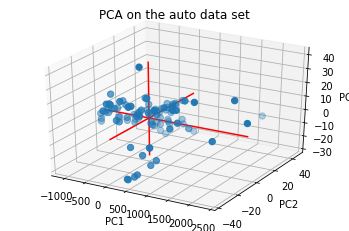

<Figure size 3600x3600 with 0 Axes>

In [521]:
# Plot initialisation
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

result=principal_auto_df
fig = plt.figure()
plt.figure(figsize=(50,50))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], cmap="coolwarm", s=40)

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the auto data set")
plt.show()

We’ve reduced 18 dimensions to just 3! Let’s plot these three dimensions out!

#### 8.	Using Matplotlib library, create a scatter plot of the (non-normalized) Weight attribute relative to MPG. Be sure that your plot contains appropriate labels for the axes.

Note: For the next steps I am using the auto data, i.e with the no-converted dummies.

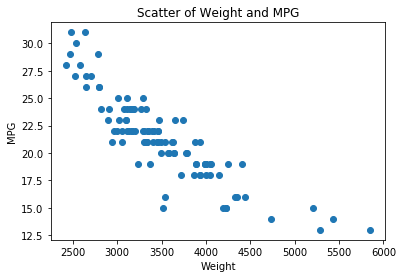

In [522]:
auto_MPG=auto['Mileage (mpg)']
plt.scatter(auto_Weight,auto_MPG)
plt.title('Scatter of Weight and MPG')
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

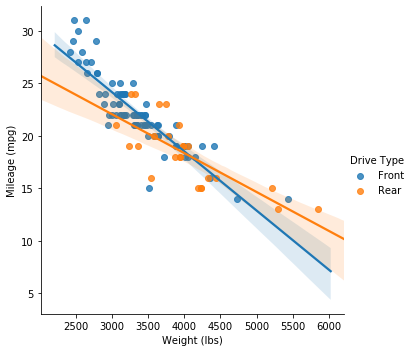

In [523]:
#seaborn scatterplot method
sn.lmplot(data=auto, x='Weight (lbs)', y='Mileage (mpg)', hue='Drive Type')

#### 9.	Using the hist function in Matplotlib (or Seaborn or both), create histograms for (non-normalized) Luggage (using 6 bins) and MPG (using 7 bins).

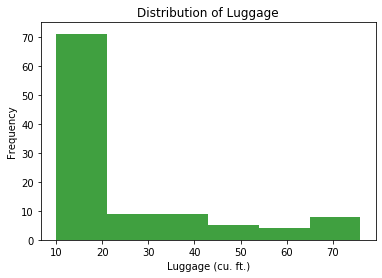

In [524]:
auto_luggage=auto['Luggage (cu. ft.)']
#histogram of weight using 6 bins
n, bins, patches = plt.hist(auto_luggage, bins=6, facecolor='green', alpha=0.75)
plt.ylim(0, 75)
plt.title('Distribution of Luggage')
plt.xlabel("Luggage (cu. ft.)")
plt.ylabel("Frequency")
plt.show()

For the variable Mileage(MPG)

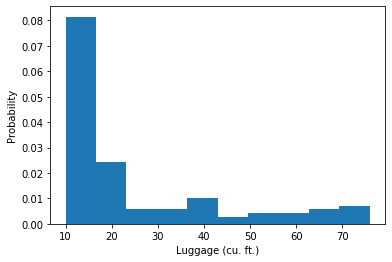

In [525]:
plt.hist(auto_luggage, density=True, bins=10)  # density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Luggage (cu. ft.)');

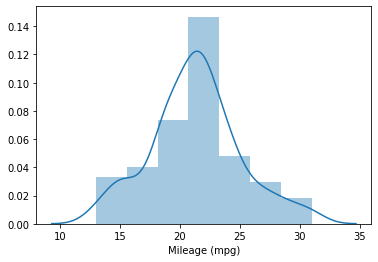

In [526]:
# Hist with sn seaborn method - control the number of bins
sn.distplot(auto_MPG, bins=7 )

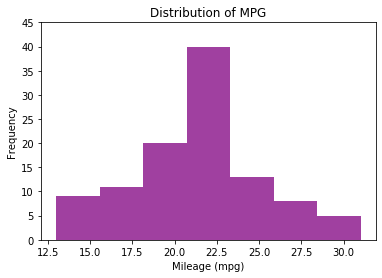

In [527]:
n, bins, patches = plt.hist(auto_MPG, 7, facecolor='purple', alpha=0.75)
plt.ylim(0, 45)
plt.title('Distribution of MPG')
plt.xlabel("Mileage (mpg)")
plt.ylabel("Frequency")
plt.show()

#### 10.	Perform a cross-tabulation of the two "fuel type" variables versus the two "Drive type" variables

In [528]:
#cross validation tab
auto_fuel=auto['Fuel Type']
auto_DriveType=auto['Drive Type']
auto_cssvalid=pd.crosstab(auto_fuel, auto_DriveType,colnames=['   DRIVE TYPE'],rownames=['FUEL TYPE'])
print(auto_cssvalid)

   DRIVE TYPE  Front  Rear
FUEL TYPE                 
Premium           11     8
Regular           70    17


Text(0.5, 1.0, 'Drive type by Fuel type')

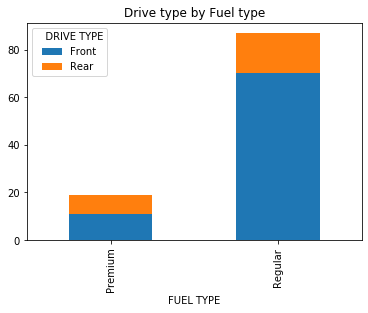

In [529]:
#bar chart of Drive type by type of fuel
auto_cssvalid.plot(kind='bar', stacked=True)
plt.title('Drive type by Fuel type')

According to the graph, most cars use regular fuel, and among these cars, the large amount is in the front drive mode. For those who use premium fuel, we have almost the same number.

#### 11.	Create a new data frame where fuel is “regular” AND MPG is over 21. Call it Auto_sub. 

In [435]:
auto3=auto.rename(columns={'Fuel Type':'Fuel_Type', 'Drive Type':'Drive_Type', 'Mileage (mpg)':'MPG'})

In [436]:
auto_sub=auto3.query('MPG > 21 and Fuel_Type=="Regular"' ) 

auto_sub.head(7)

,Name,Drive_Type,MPG,Fuel_Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,31,Regular,13.2,172,101,67,39,2635.0,47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
6,Buick Century,Front,22,Regular,17.5,195,109,73,40,3350.0,50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
12,Chevrolet Cavalier,Front,26,Regular,15.2,181,104,68,38,2795.0,50.5,14.0,54.5,41.5,4.5,53.5,28.0,2.0
14,Chevrolet Lumina,Front,22,Regular,16.6,201,108,73,44,3350.0,51.0,16.0,58.5,42.5,4.5,57.0,30.0,2.0
15,Chevrolet Malibu,Front,24,Regular,15.2,190,107,69,40,3075.0,50.5,17.0,55.0,43.0,4.5,54.0,30.5,2.0
16,Chevrolet Prizm,Front,31,Regular,13.2,175,97,67,34,2480.0,48.0,12.0,52.5,40.5,4.0,52.0,26.5,2.0
20,Chrysler Cirrus,Front,22,Regular,16.0,186,108,72,39,3170.0,49.0,16.0,55.0,42.0,4.0,54.5,31.0,1.5


In [437]:
auto_sub.shape

(41, 18)

In [438]:
auto_sub.columns

Index(['Name', 'Drive_Type', 'MPG', 'Fuel_Type', 'Capacity (gal)',
       'Length (inches)', 'Wheel Base (inches)', 'Width (inches)',
       'Turning Circle (feet)', 'Weight (lbs)', 'Door Top (inches)',
       'Luggage (cu. ft.)', 'Front Shoulder (inches)',
       'Front Leg Room (inches)', 'Front Head Room (inches)',
       'Rear Shoulder (inches)', 'Rear Leg Room (inches)',
       'Rear Head Room (inches)'],
      dtype='object')

End !